In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
lab_air = np.loadtxt('lab_air')

# 5.1 Blackbody Temperature

In [3]:
max_wavenum_lab_air = lab_air[(np.argmax(lab_air[:, 1])), 0]
temp_lab_air = 5.8* 10**(10) /max_wavenum_lab_air/2.99 * 10**(10)
temp_lab_air, max_wavenum_lab_air/2.99 * 10**(10)

(np.float64(1.0660337746360587e+17), np.float64(6085757632926.421))

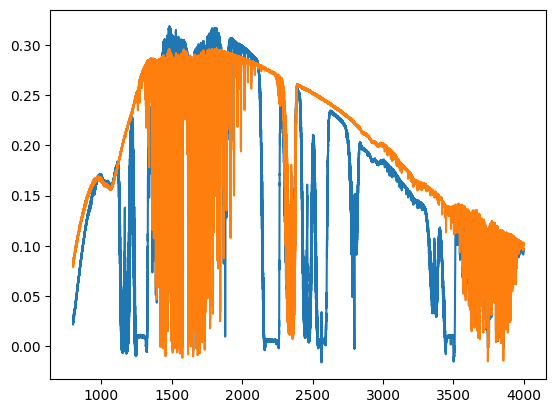

In [4]:
N2O = np.loadtxt('N2O')
plt.plot(N2O[:, 0], N2O[:, 1])
plt.plot(lab_air[:, 0], lab_air[:, 1])

In [5]:
max_wavenum_N2O = N2O[(np.argmax(N2O[:, 1])), 0]
temp_n2o = 5.8* 10**(10) /max_wavenum_N2O/2.99 * 10**(10)
temp_n2o

np.float64(1.3079295538021126e+17)

$FreqN2O = 4.96 * 10^{13}$


$FreqLabair = 6.085 * 10^{13}$

$tempN2O = 1307 K$

$tempLabair = 1066 K$

# 5.3 Calculation of moment of inertia

In [37]:
N2O_2B_r = np.array([1167.92,
1167.1, 
1166.33,
1165.5, 
1164.7])

N2O_2B_r = abs(np.diff(N2O_2B_r))
mean_2B_r = N2O_2B_r.mean()
B_r = mean_2B_r/2

In [41]:
Iner_r = -constants.hbar**2/(2*B_r*constants.c*100*constants.h)
Iner_r

np.float64(-6.9547209547763614e-46)

In [44]:
N2O_2B_p = np.array([1168.814,
1169.714,
1170.5,  
1171.448,
1172.3])   

N2O_2B_p = (np.diff(N2O_2B_p))    
mean_2B_p = N2O_2B_p.mean()
B_p = mean_2B_p/2
B = (B_r + B_p)/2

In [9]:
Iner_p = constants.hbar**2/(2*B_p*constants.c*100*constants.h)
aver = lambda x: np.mean(x)
average_iner =aver((Iner_p + Iner_r) / 2)

In [10]:
theo_iner = 6.680777 * 10**(-46)
((average_iner - theo_iner)/theo_iner) *100

np.float64(0.12877537235154124)

# 5.4 Determination of the gas sample pressure

In [11]:
I_r = 1216.49
I_l = 1118.31
mask = (N2O[:, 0] > I_l)
I_l_idx = int(np.argmax(mask))

In [12]:
mask2 = (N2O[:, 0] > I_r)
I_r_idx = int(np.argmax(mask2))

In [13]:
nu = I_r - I_l
I_0 = (N2O[I_l_idx,1] + N2O[I_r_idx,1] /2) * nu
I_0

np.float64(28.474089425010018)

In [14]:
from scipy import integrate

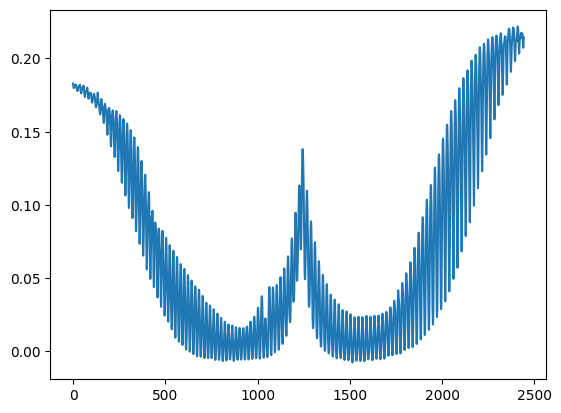

In [15]:
plt.plot(N2O[I_l_idx:I_r_idx,1])

In [16]:
I = integrate.simpson(N2O[I_l_idx:I_r_idx, 1], N2O[I_l_idx:I_r_idx, 0], dx = 0.01)
I

np.float64(7.295172233537721)

In [17]:
- (np.log(I/I_0) * nu) / (15 * 6.98)

np.float64(1.276979285209386)

### Co2 - Lab air

In [18]:
I_r = 2388.1
I_l = 2284.4
mask = (lab_air[:, 0] > I_l)
I_l_idx = int(np.argmax(mask))

In [19]:
mask2 = (lab_air[:, 0] > I_r)
I_r_idx = int(np.argmax(mask2))

In [20]:
lab_air[I_l_idx:I_r_idx]

array([[2.28442577e+03, 2.60831147e-01],
       [2.28446595e+03, 2.60989249e-01],
       [2.28450612e+03, 2.60939777e-01],
       ...,
       [2.38800580e+03, 2.57416576e-01],
       [2.38804597e+03, 2.58077919e-01],
       [2.38808615e+03, 2.58875638e-01]], shape=(2581, 2))

In [21]:
nu = I_r - I_l
I_0 = (lab_air[I_l_idx,1] + lab_air[I_r_idx,1] /2) * nu
I_0

np.float64(40.510873620299925)

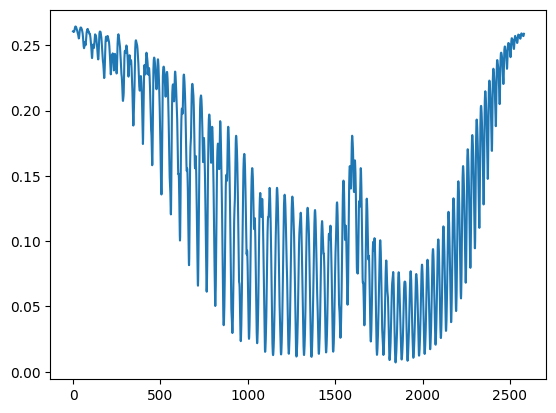

In [22]:
plt.plot(lab_air[I_l_idx:I_r_idx,1])

In [23]:
I = integrate.simpson(lab_air[I_l_idx:I_r_idx, 1], lab_air[I_l_idx:I_r_idx, 0], dx = 0.01)
- (np.log(I/I_0) * nu) / (15 * 2500)

np.float64(0.0028814038318457926)

## 5.5 Temperature determination of $N_2O$

In [50]:
B

np.float64(0.419124999999994)

In [56]:
J = 17
T = (2 * B / 0.695) * (J + 0.5)**2
T

np.float64(369.3727517985559)